In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils

In [34]:
# opsdb = maf.db.OpsimDatabase('long_gaps_nightsoff1_v2.0_10yrs.db')
opsdb = maf.db.OpsimDatabase('../baseline/baseline_v2.0_10yrs.db')


In [35]:
bundleList = []

metric = maf.metrics.PassMetric(cols='observationStartMJD')

slicer = maf.slicers.UserPointsSlicer(ra=[0], dec=[-20])
constraint = ''
bundleList.append(maf.MetricBundle(metric, slicer, constraint))


In [36]:
outDir = 'temp'
bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
bg = maf.MetricBundleGroup(bd, opsdb, outDir='temp')

In [37]:
bg.runAll()

Querying database observations with no constraint for columns ['fieldDec', 'observationStartMJD', 'rotSkyPos', 'fieldRA'].
Found 2084626 visits
Running:  ['opsim_Pass_observationStartMJD_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [38]:
bundleList[0].metricValues

masked_array(data=[array([(-21.50902375, 61340.16449363, 241.43198829, 3.58836009e+02),
                          (-21.36953311, 62024.14658773, 114.91860964, 3.58759132e+02),
                          (-21.36953311, 62024.15962277, 117.70861598, 3.58759132e+02),
                          (-21.50902375, 61340.18849697, 244.65248622, 3.58836009e+02),
                          (-21.39250544, 62002.3378917 , 202.31659101, 3.58934408e+02),
                          (-21.36953311, 62024.12235663, 112.1972806 , 3.58759132e+02),
                          (-21.39250544, 62002.3604312 , 207.45185562, 3.58934408e+02),
                          (-21.57644716, 61268.22223817, 134.62217303, 3.59362993e+02),
                          (-21.60128686, 63527.00068658,  42.93599341, 3.59813263e+02),
                          (-21.62064273, 60590.11809836,  89.59626192, 3.59826346e+02),
                          (-21.79648903, 60984.19715797, 229.51934683, 3.59406438e+02),
                          (-21.4

In [39]:
full_diff = bundleList[0].metricValues[0]['observationStartMJD'][:,np.newaxis] - bundleList[0].metricValues[0]['observationStartMJD']

In [40]:
good = np.where((full_diff > 0) & (full_diff < 1.1) )

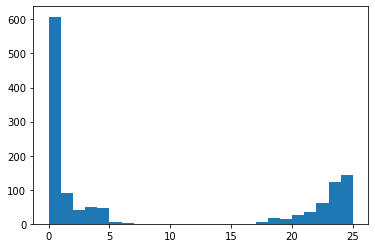

In [41]:
_ack = plt.hist(full_diff[good]*24., bins=np.arange(26))

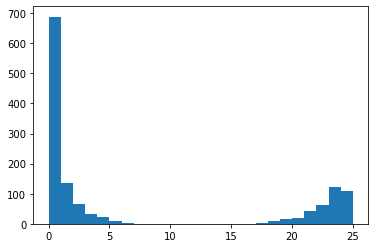

In [33]:
_ack = plt.hist(full_diff[good]*24., bins=np.arange(26))